In [28]:
#import all the necessary dependiencies 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import talib
import statsmodels.api as sm 
import time 
import os
import yfinance as yf
pd.options.display.float_format = '{:.3f}'.format

In [29]:
def get_data(symbol):
    stock = yf.Ticker(symbol)
    df = stock.history(period="max")
    return pd.DataFrame(df['Close'])

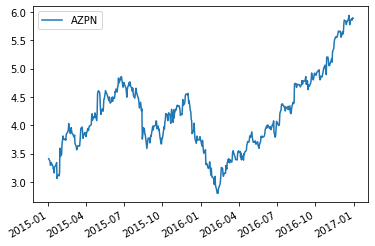

            AZPN
2015-01-02 3.411
2015-01-05 3.369
2015-01-06 3.296
2015-01-07 3.295
2015-01-08 3.340


In [30]:
def norm_dist(symbol, dates, plot = False):
    '''    
    This function treats the first ever recorded stock price to be the initial value and the rest of the ditribution is accordingly normalized. Then the selected date 
    range is sliced out and the plot is shown. 
    This function accepts the list of stocks and the date range of the required plot. 
    '''
    df = get_data(symbol)
    df_nor = pd.DataFrame(index = dates)
    df = df.rename(columns = {"Close" : symbol})
    #Normalizing the Ditribution
    df =(df)/df.iloc[0]-1
    df_nor = df_nor.join(df)
    df_nor.dropna(inplace = True)
    if plot ==True:
        df_nor.plot()
        plt.show()
    return df_nor
'''
Sample Run

dates =pd.date_range('2015-01-01','2017-01-01')
print(norm_dist('AZPN', dates, True).head())
'''

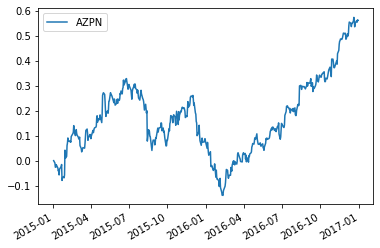

             AZPN
2015-01-02  0.000
2015-01-05 -0.009
2015-01-06 -0.026
2015-01-07 -0.026
2015-01-08 -0.016
...           ...
2016-12-23  0.549
2016-12-27  0.560
2016-12-28  0.554
2016-12-29  0.563
2016-12-30  0.561

[504 rows x 1 columns]


In [26]:
def norm_dist_yearwise(symbol, dates, plot=False):
    '''
    This function first slices out the daterange provided and then uses the first value at the 0th row of the new sliced dataframe as the normalizing value and then 
    normalizes the entire ditribution based on that and then plots it. 
    This function accepts the list of stocks and the date range of the required plot. 
    '''
    df = get_data(symbol)
    df_nor = pd.DataFrame(index = dates)
    df = df.rename(columns = {"Close" : symbol})
    df_nor = df_nor.join(df)
    df_nor = df_nor.dropna()
    #Normalizing the Ditribution
    df_nor= (df_nor)/df_nor.iloc[0]-1
    if (plot==True):
        df_nor.plot()
        plt.show()
    return df_nor

'''
Sample Run

dates =pd.date_range('2015-01-01','2017-01-01')
print(norm_dist_yearwise('AZPN', dates, True))
'''